### Configure your API keys

To fine-tune YOLOv12, you need to provide your Roboflow API key. Follow these steps:

- Go to your [`Roboflow Settings`](https://app.roboflow.com/settings/api) page. Click `Copy`. This will place your private key in the clipboard.
- In Colab, go to the left pane and click on `Secrets` (🔑). Store Roboflow API Key under the name `ROBOFLOW_API_KEY`.

In [2]:
import os
from google.colab import userdata

os.environ["ROBOFLOW_API_KEY"] = userdata.get("ROBOFLOW_API_KEY")

In [4]:
import os
HOME = os.getcwd()
print(HOME)

/content


### Install dependencies

**NOTE:** Currently, YOLOv12 does not have its own PyPI package, so we install it directly from GitHub while also adding roboflow (to conveniently pull datasets from the Roboflow Universe), supervision (to visualize inference results and benchmark the model’s performance), and flash-attn (to accelerate attention-based computations via optimized CUDA kernels).

In [5]:
!pip install -q git+https://github.com/sunsmarterjie/yolov12.git roboflow supervision flash-attn

  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.4/8.4 MB 109.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 89.8/89.8 kB 8.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 6.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.9/49.9 MB 22.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.2/207.2 kB 19.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 56.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.2/4.2 MB 80.4 MB/s eta 0:00:00


In [11]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="c2d5GEHX1WSdstLbDl3D")
project = rf.workspace("cadcom").project("own-alpr-with-yolov12-ia6ta")
version = project.version(2)
dataset = version.download("yolov12")

loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to Own-ALPR-with-YoloV12-2 in yolov12:: 100%|██████████| 11066/11066 [00:01<00:00, 7905.04it/s]


results.png not found in runs/detect/train2
confusion_matrix.png not found in runs/detect/train2
Displaying labels.jpg:


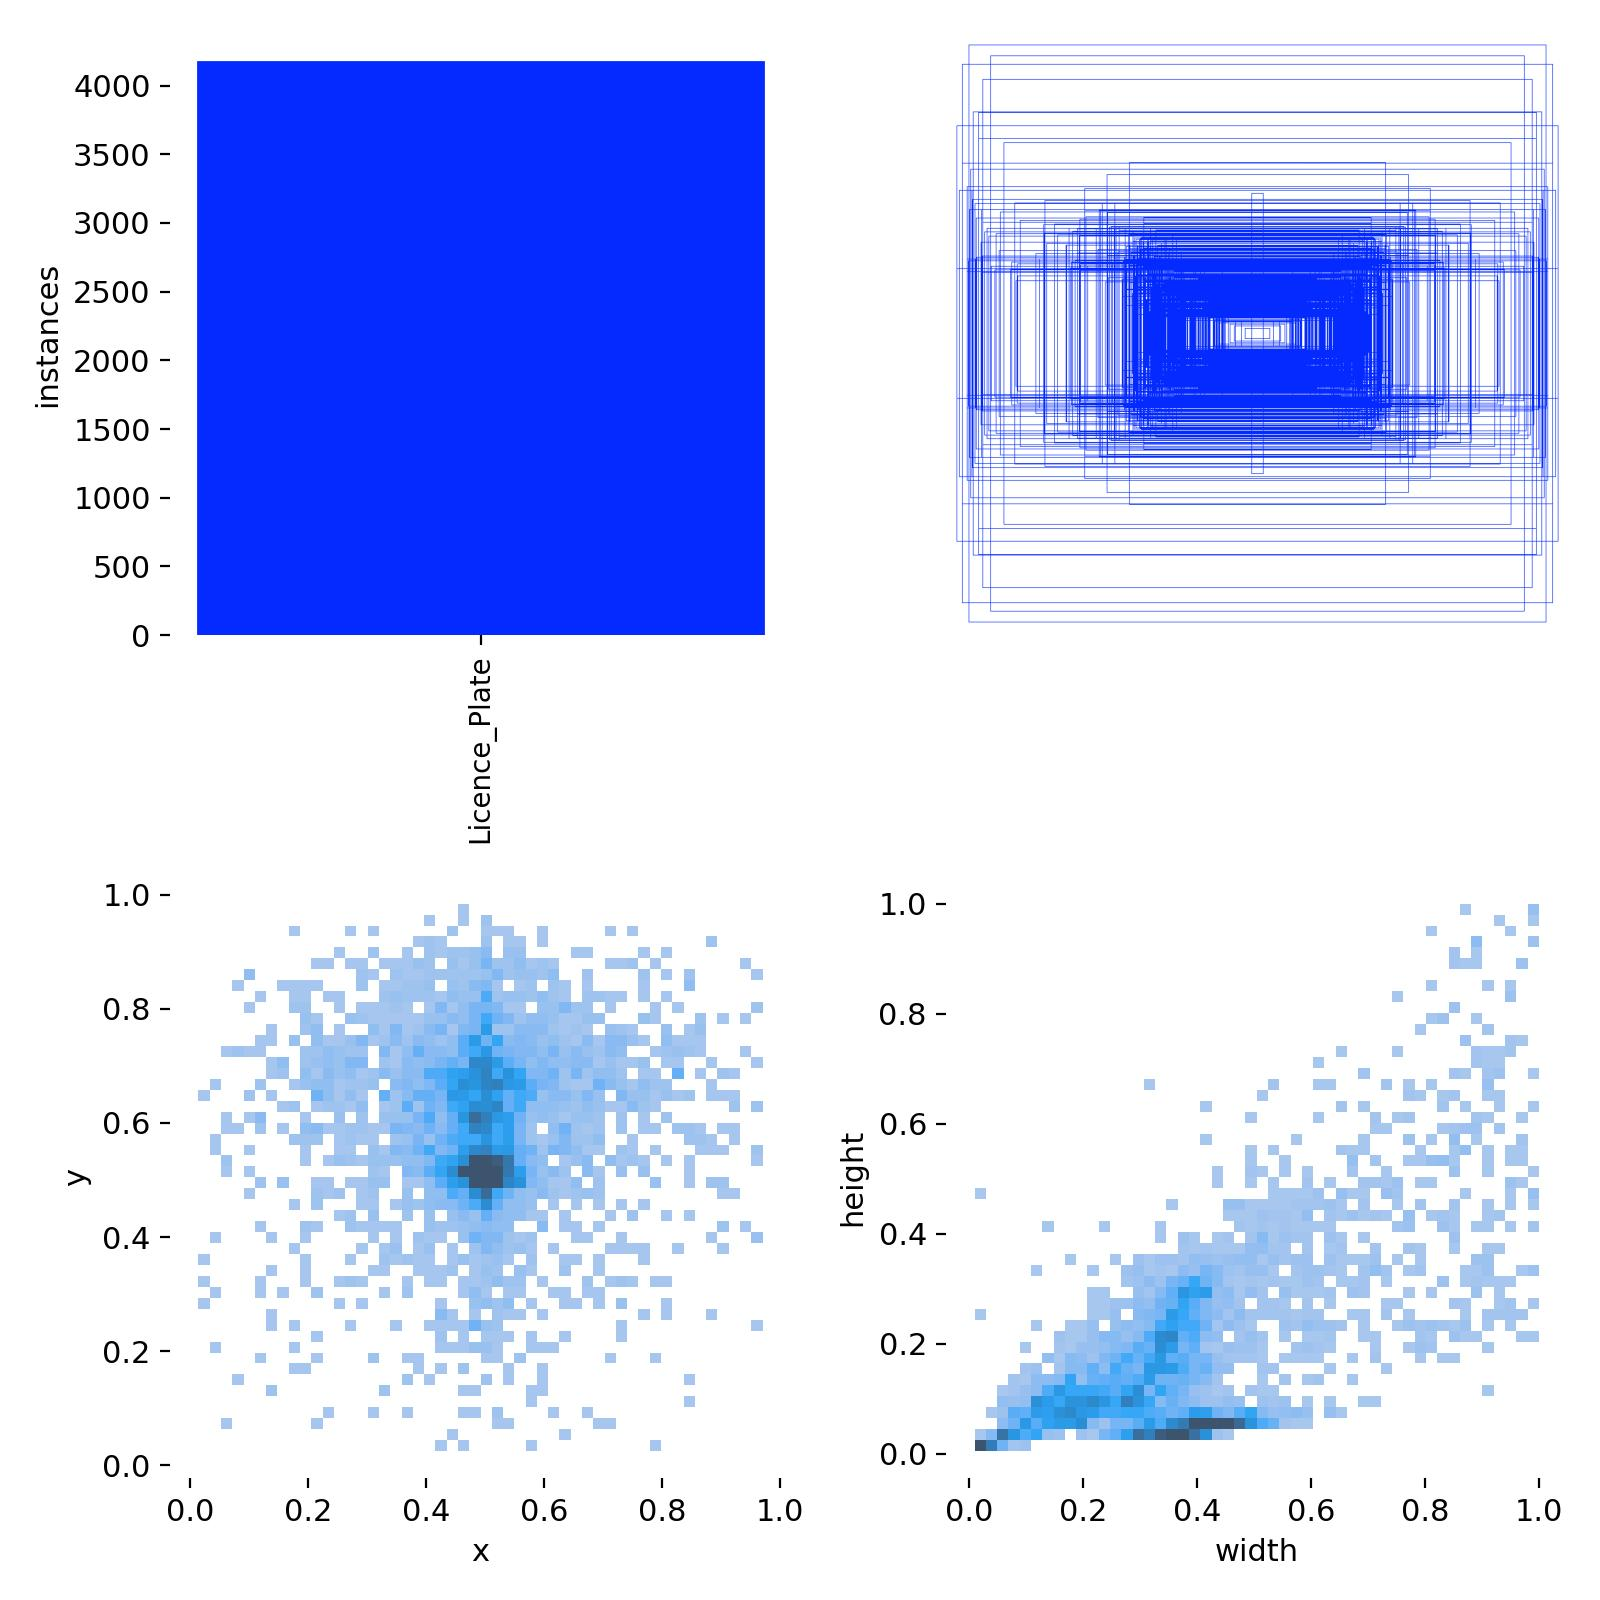

Displaying train_batch0.jpg:


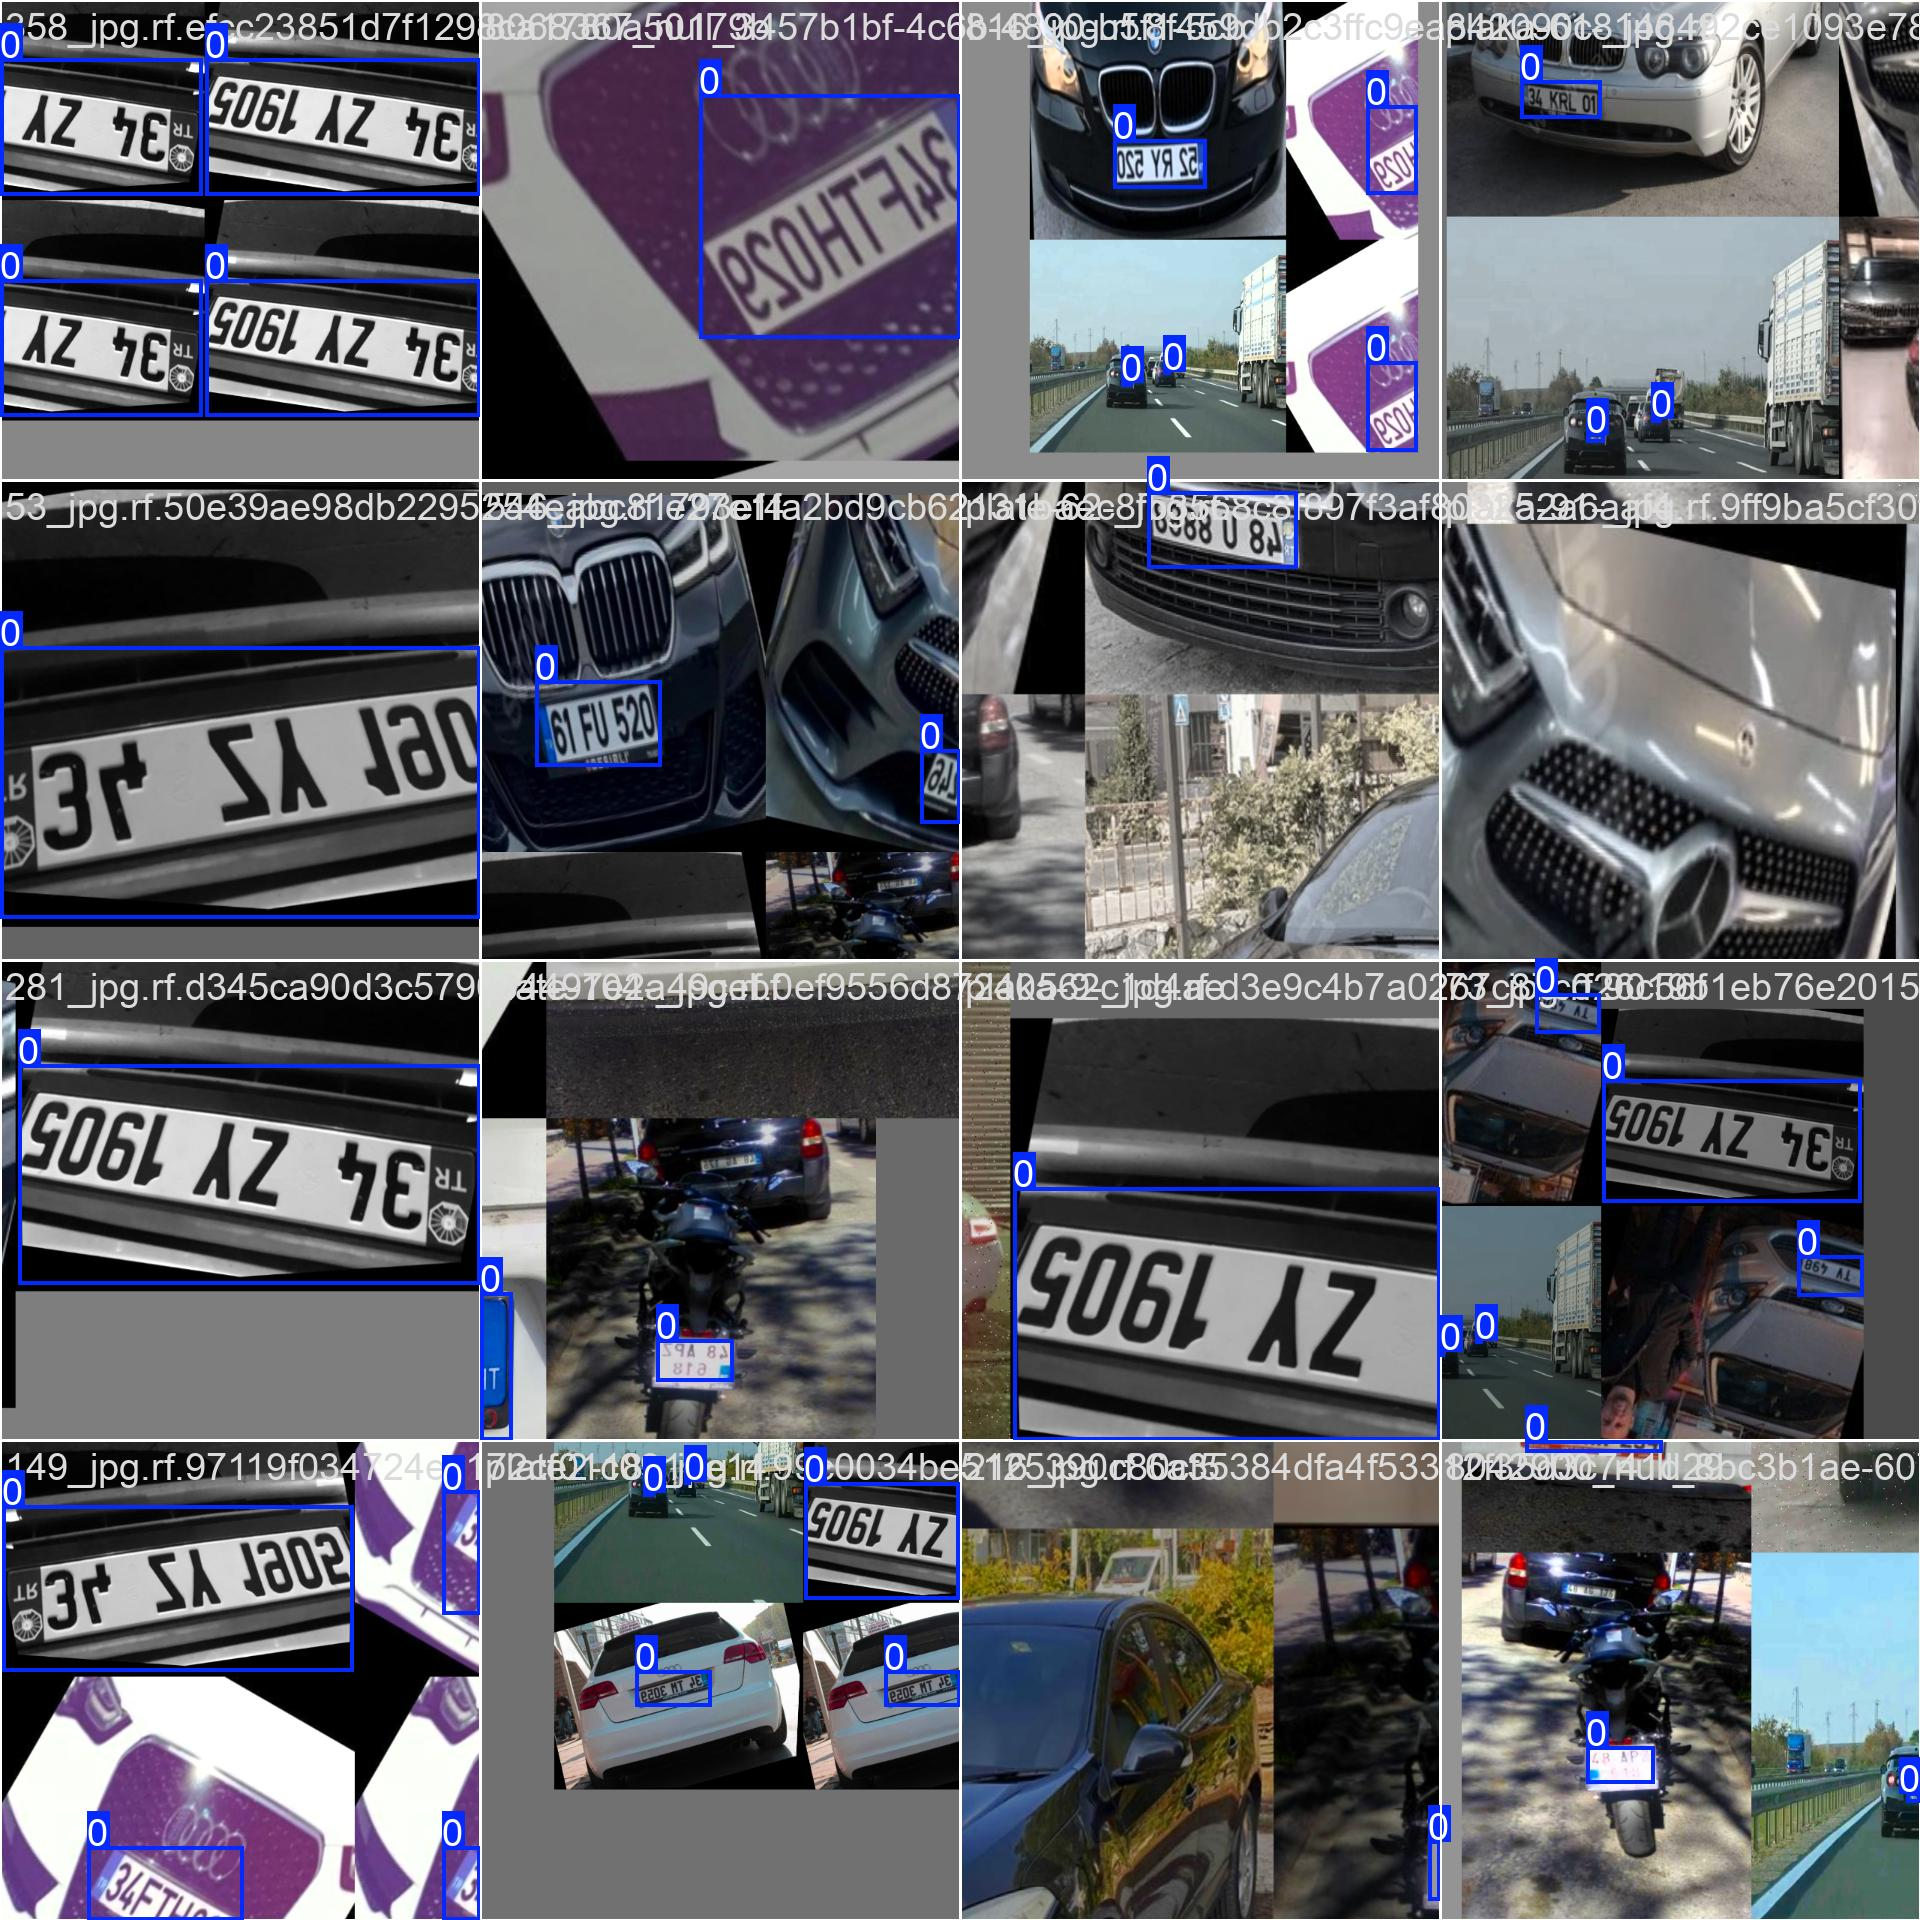

val_batch0.jpg not found in runs/detect/train2


In [13]:
from IPython.display import Image, display
import os

# Define the path to the training results directory
results_dir = 'runs/detect/train2'

# List and display the relevant images from the results directory
for filename in ['results.png', 'confusion_matrix.png', 'labels.jpg', 'train_batch0.jpg', 'val_batch0.jpg']:
    filepath = os.path.join(results_dir, filename)
    if os.path.exists(filepath):
        print(f"Displaying {filename}:")
        display(Image(filepath))
    else:
        print(f"{filename} not found in {results_dir}")

In [14]:
# Define the path to the dataset
DATASET_PATH = "/content/Own-ALPR-with-YoloV12-2"

# Train the model
# You can adjust hyperparameters like epochs, batch size, etc.
!yolo train data={DATASET_PATH}/data.yaml model=yolov12n.pt epochs=100 batch=16 imgsz=640

FlashAttention is not available on this device. Using scaled_dot_product_attention instead.
New https://pypi.org/project/ultralytics/8.3.205 available 😃 Update with 'pip install -U ultralytics'
Ultralytics 8.3.63 🚀 Python-3.12.11 torch-2.8.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: task=detect, mode=train, model=yolov12n.pt, data=/content/Own-ALPR-with-YoloV12-2/data.yaml, epochs=100, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train3, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=

FlashAttention is not available on this device. Using scaled_dot_product_attention instead.
Ultralytics 8.3.63 🚀 Python-3.12.11 torch-2.8.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
YOLOv12n summary (fused): 376 layers, 2,508,539 parameters, 0 gradients, 5.8 GFLOPs

image 1/526 /content/Own-ALPR-with-YoloV12-2/test/images/101_jpg.rf.458b977de5b8d98bca9e3b2e6f871018.jpg: 640x640 1 Licence_Plate, 14.0ms
image 2/526 /content/Own-ALPR-with-YoloV12-2/test/images/102_jpg.rf.a402054f23cae59e64720e5ec4b5020b.jpg: 640x640 1 Licence_Plate, 12.9ms
image 3/526 /content/Own-ALPR-with-YoloV12-2/test/images/108_jpg.rf.3fa1651091f6d1c77c36bfacbdb1f7a6.jpg: 640x640 1 Licence_Plate, 12.1ms
image 4/526 /content/Own-ALPR-with-YoloV12-2/test/images/111_jpg.rf.16cee4219460758128e0012d170ad5ef.jpg: 640x640 1 Licence_Plate, 11.9ms
image 5/526 /content/Own-ALPR-with-YoloV12-2/test/images/112_jpg.rf.70c88a3503a743d91c7ba54860c86f84.jpg: 640x640 2 Licence_Plates, 12.1ms
image 6/526 /content/Own-ALPR-with-YoloV12-2/test/

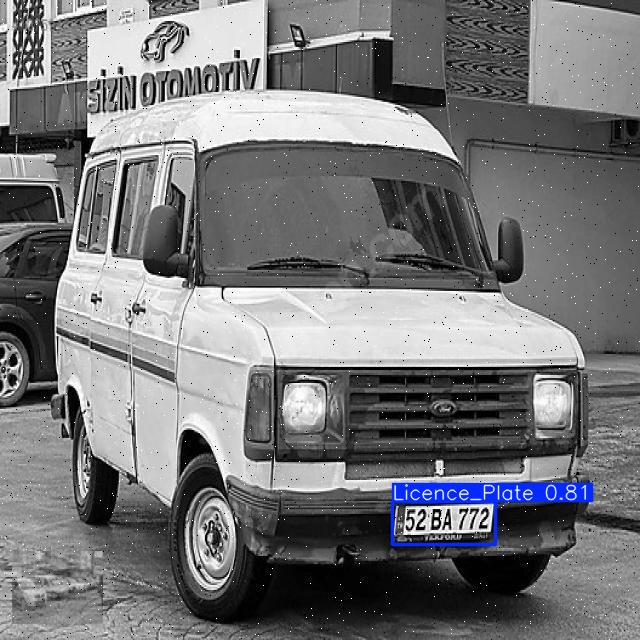

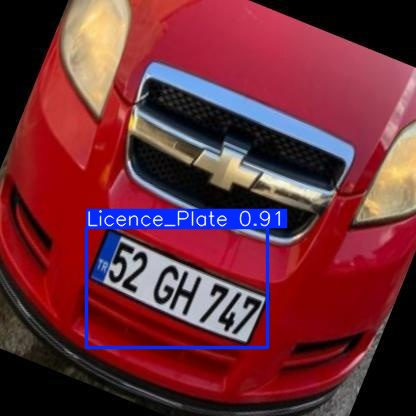

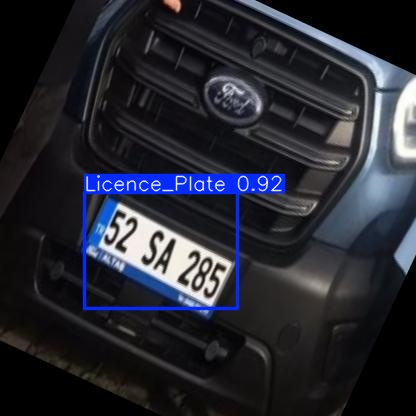

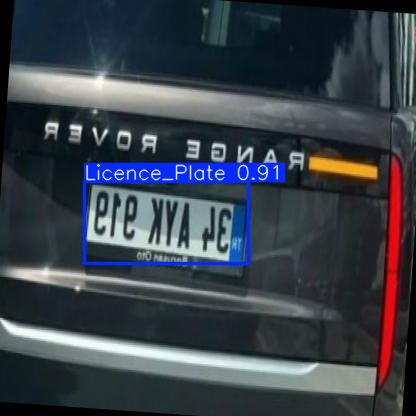

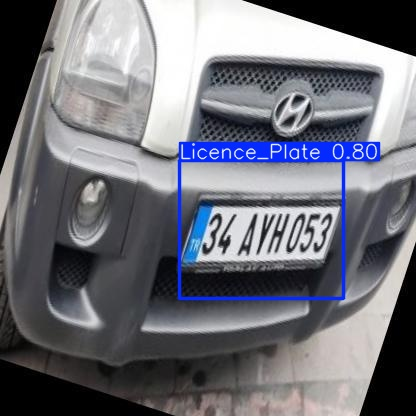

In [18]:
# Define the path to the best model weights
BEST_MODEL_PATH = "/content/runs/detect/train3/weights/best.pt"

# Define the path to the test dataset images
TEST_DATASET_PATH = "/content/Own-ALPR-with-YoloV12-2/test/images"

# Perform inference on the test dataset
!yolo predict model={BEST_MODEL_PATH} source={TEST_DATASET_PATH} name="test_results"

# Display some of the inference results
from IPython.display import Image, display
import glob
import os

results_dir = 'runs/detect/test_results'
image_files = glob.glob(os.path.join(results_dir, '*.jpg'))

print("Displaying a few test inference results:")
for img_path in image_files[:5]: # Display the first 5 images
    display(Image(img_path))

In [17]:
# Define the path to the best model weights
BEST_MODEL_PATH = "/content/runs/detect/train3/weights/best.pt"

# Define the path to the test dataset configuration
TEST_DATASET_CONFIG = "/content/Own-ALPR-with-YoloV12-2/data.yaml"

# Evaluate the model performance
!yolo val model={BEST_MODEL_PATH} data={TEST_DATASET_CONFIG}

FlashAttention is not available on this device. Using scaled_dot_product_attention instead.
Ultralytics 8.3.63 🚀 Python-3.12.11 torch-2.8.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
YOLOv12n summary (fused): 376 layers, 2,508,539 parameters, 0 gradients, 5.8 GFLOPs
val: Scanning /content/Own-ALPR-with-YoloV12-2/valid/labels.cache... 1109 images, 0 backgrounds, 0 corrupt: 100% 1109/1109 [00:00<?, ?it/s]
WARNING ⚠️ Box and segment counts should be equal, but got len(segments) = 379, len(boxes) = 1208. To resolve this only boxes will be used and all segments will be removed. To avoid this please supply either a detect or segment dataset, not a detect-segment mixed dataset.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 70/70 [00:12<00:00,  5.63it/s]
                   all       1109       1208      0.973      0.949      0.977      0.779
Speed: 0.4ms preprocess, 6.6ms inference, 0.0ms loss, 1.0ms postprocess per image
Results saved to runs/detect/val

Saving visualizations to: /content/test_visualizations
Visualization complete. Displaying a few results:
Displaying: plaka-34-_jpg.rf.16af0623fffb4440cd12842be1b9c54a.jpg


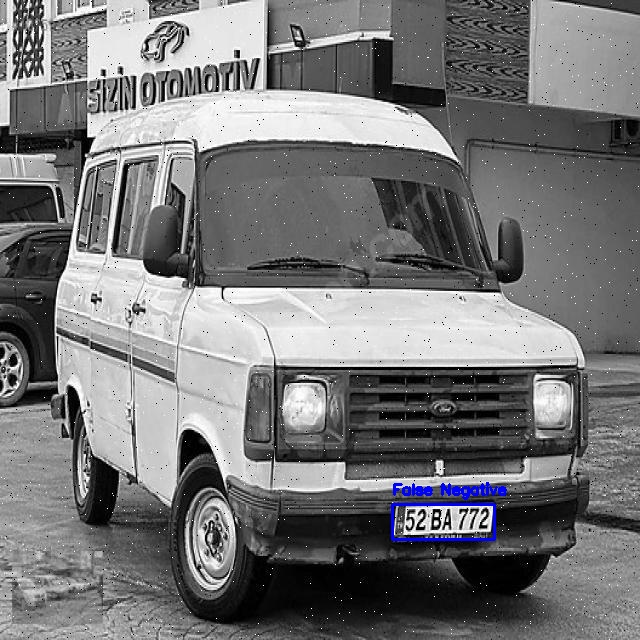

Displaying: 561_jpg.rf.0c87d001a43d734ae61614673414b4f5.jpg


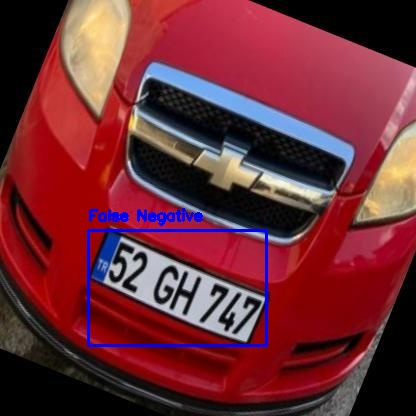

Displaying: 169_jpg.rf.9c932db530c5d7c00f14e9321d278287.jpg


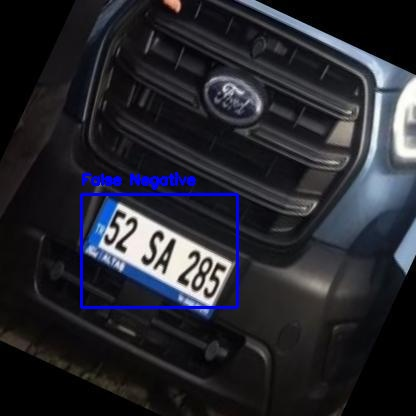

Displaying: 242_jpg.rf.0873c910ee327c7368edd90b56cd8247.jpg


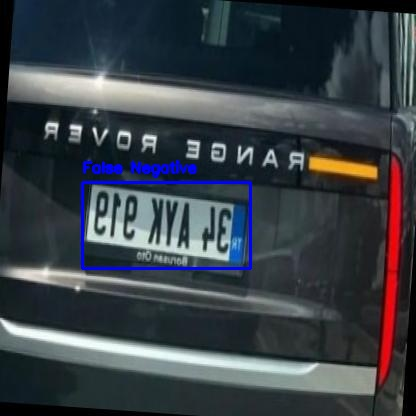

Displaying: 689_jpg.rf.7605fbfb4bb77708de5c338b9eec1900.jpg


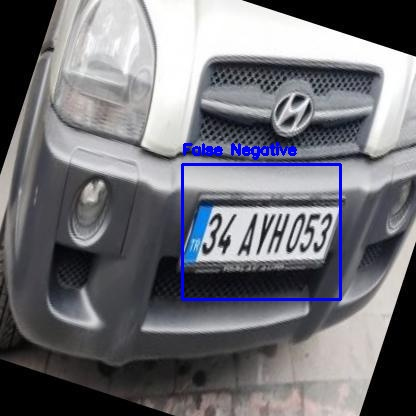

In [44]:
import cv2
import numpy as np
import os
import glob
from IPython.display import Image, display


# Define the paths
TEST_IMAGES_PATH = "/content/Own-ALPR-with-YoloV12-2/test/images"
OUTPUT_VISUALIZATION_PATH = "/content/test_visualizations"
os.makedirs(OUTPUT_VISUALIZATION_PATH, exist_ok=True)

# Define colors (BGR format)
FP_COLOR = (0, 0, 255) # Red for False Positives
FN_COLOR = (255, 0, 0) # Blue for False Negatives

print(f"Saving visualizations to: {OUTPUT_VISUALIZATION_PATH}")

# Iterate through each image filename in the analysis results
for image_filename, results in image_analysis_results.items():
    image_path = os.path.join(TEST_IMAGES_PATH, image_filename)

    # Load the original image
    image = cv2.imread(image_path)
    if image is None:
        print(f"Warning: Could not load image {image_filename}. Skipping.")
        continue

    height, width, _ = image.shape

    # Visualize False Positives
    for fp in results['false_positives']:
        # Ensure bbox has at least 4 elements and take the first 4
        if len(fp['bbox']) >= 4:
            center_x, center_y, bbox_width, bbox_height = fp['bbox'][:4]
            # Convert normalized YOLO bbox to pixel coordinates (x_min, y_min, x_max, y_max)
            x_min = int((center_x - bbox_width / 2) * width)
            y_min = int((center_y - bbox_height / 2) * height)
            x_max = int((center_x + bbox_width / 2) * width)
            y_max = int((center_y + bbox_height / 2) * height)

            # Draw bounding box
            cv2.rectangle(image, (x_min, y_min), (x_max, y_max), FP_COLOR, 2)
            # Add label
            label = "False Positive"
            cv2.putText(image, label, (x_min, y_min - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, FP_COLOR, 2)
        else:
            print(f"Warning: False positive bbox for {image_filename} has less than 4 elements: {fp['bbox']}")


    # Visualize False Negatives
    for fn in results['false_negatives']:
        # Ensure bbox has at least 4 elements and take the first 4
        if len(fn['bbox']) >= 4:
            center_x, center_y, bbox_width, bbox_height = fn['bbox'][:4]
            # Convert normalized YOLO bbox to pixel coordinates (x_min, y_min, x_max, y_max)
            x_min = int((center_x - bbox_width / 2) * width)
            y_min = int((center_y - bbox_height / 2) * height)
            x_max = int((center_x + bbox_width / 2) * width)
            y_max = int((center_y + bbox_height / 2) * height)

            # Draw bounding box
            cv2.rectangle(image, (x_min, y_min), (x_max, y_max), FN_COLOR, 2)
            # Add label
            label = "False Negative"
            cv2.putText(image, label, (x_min, y_min - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, FN_COLOR, 2)
        else:
            print(f"Warning: False negative bbox for {image_filename} has less than 4 elements: {fn['bbox']}")


    # Save the visualized image
    output_path = os.path.join(OUTPUT_VISUALIZATION_PATH, image_filename)
    cv2.imwrite(output_path, image)

print("Visualization complete. Displaying a few results:")

# Display a few visualized images
visualized_image_files = glob.glob(os.path.join(OUTPUT_VISUALIZATION_PATH, '*.jpg'))

for img_path in visualized_image_files[:5]: # Display the first 5 images
    print(f"Displaying: {os.path.basename(img_path)}")
    display(Image(img_path))

In [45]:
# Define the path to the best model weights
BEST_MODEL_PATH = "/content/runs/detect/train3/weights/best.pt"

# Export the model to ONNX format
!yolo export model={BEST_MODEL_PATH} format=onnx

FlashAttention is not available on this device. Using scaled_dot_product_attention instead.
Ultralytics 8.3.63 🚀 Python-3.12.11 torch-2.8.0+cu126 CPU (Intel Xeon 2.00GHz)
YOLOv12n summary (fused): 376 layers, 2,508,539 parameters, 0 gradients, 5.8 GFLOPs

PyTorch: starting from '/content/runs/detect/train3/weights/best.pt' with input shape (1, 3, 640, 640) BCHW and output shape(s) (1, 5, 8400) (15.1 MB)
requirements: Ultralytics requirements ['onnx>=1.12.0', 'onnxslim', 'onnxruntime-gpu'] not found, attempting AutoUpdate...
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.2/18.2 MB 236.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 165.0/165.0 kB 166.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 300.5/300.5 MB 143.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.0/46.0 kB 197.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.8/86.8 kB 228.8 MB/s eta 0:00:00

requirements: AutoUpdate success ✅ 17.2s, installed 3 packages: ['o